In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from eboss_figs import setup_color

In [4]:
setup_color()

In [5]:
d = {}
d['No Treatment']     = np.load('/home/mehdi/data/eboss/data/v7_2/1.0/measurements/nnbar/nnbar_NGC_noweight_mainhighz_512_v7_2_highz_512.npy', allow_pickle=True)
d['Standard (Linear)'] = np.load('/home/mehdi/data/eboss/data/v7_2/1.0/measurements/nnbar/nnbar_NGC_knownsystot_mainhighz_512_v7_2_main_512.npy', allow_pickle=True)
d['NN (Pseudo Poisson)']   = np.load('/home/mehdi/data/eboss/data/v7_2/1.0/measurements/nnbar/nnbar_NGC_known_maindnnps_512_v7_2_main_512.npy', allow_pickle=True)
d['NN (Poisson)']     = np.load('/home/mehdi/data/eboss/data/v7_2/1.0/measurements/nnbar/nnbar_NGC_known_mainhighz_512_v7_2_main_512.npy', allow_pickle=True)

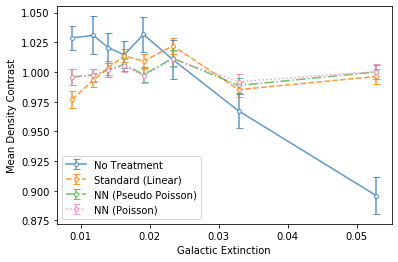

In [6]:
ix = 1
for n in d:
    plt.errorbar(d[n][ix]['bin_avg'], d[n][ix]['nnbar'], d[n][ix]['nnbar_err'], 
             label=n, markersize=4, marker='o', mfc='w', capsize=3.5, alpha=0.8)
plt.legend()
plt.xlabel(r'Galactic Extinction')
plt.ylabel('Mean Density Contrast')
plt.savefig('pnll.png', dpi=300, bbox_inches='tight')

In [7]:
import nbodykit.lab as nb

In [12]:
def read_nb(filename):
    """ """
    p_ = nb.ConvolvedFFTPower.load(filename)
    return (p_.poles['k'], p_.poles['power_0']-p_.attrs['shotnoise'])

pk = {}
# pk['No Treatment'] = read_nb('/home/mehdi/data/eboss/data/v7_2/1.0/measurements/spectra/spectra_NGC_noweight_mainhighz_512_v7_2_main.json')
pk['Standard (Linear)'] = read_nb('/home/mehdi/data/eboss/data/v7_2/1.0/measurements/spectra/spectra_NGC_knownsystot_mainhighz_512_v7_2_main.json')
pk['NN (Pseudo Poisson)'] = read_nb('/home/mehdi/data/eboss/data/v7_2/1.0/measurements/spectra/spectra_NGC_known_maindnnps_512_v7_2_main.json')
pk['NN (Poisson)'] = read_nb('/home/mehdi/data/eboss/data/v7_2/1.0/measurements/spectra/spectra_NGC_known_mainhighz_256_v7_2_main.json')

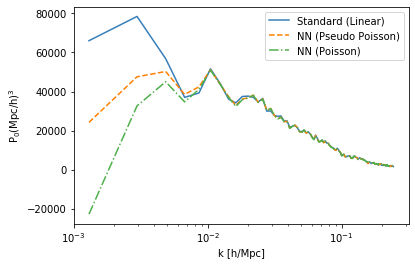

In [15]:
for n, pki in pk.items():
    plt.semilogx(*pki, label=n)
plt.legend()
plt.xlabel(r'k [h/Mpc]')
plt.ylabel(r'P$_{0}$(Mpc/h)$^{3}$')
plt.savefig('pnll_pk.png', dpi=300, bbox_inches='tight')